In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

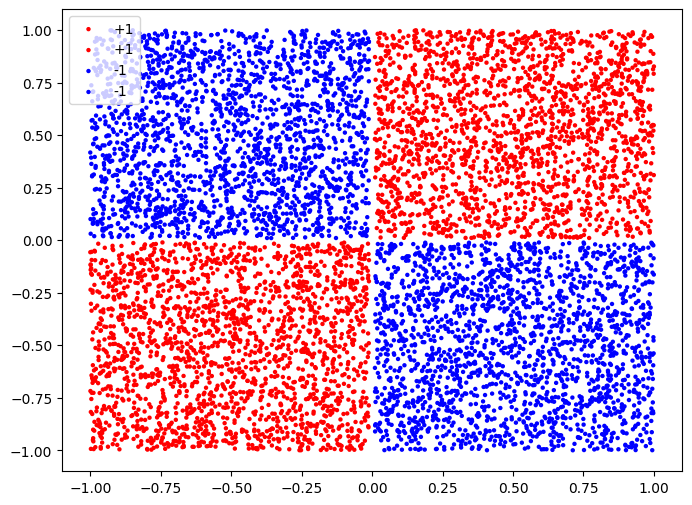

In [3]:

# 
N = 2000

a=0.01
b=1

X_1 = np.random.uniform(a,b,2*N).reshape([N,2])
X_2 = np.random.uniform(-a,-b,2*N).reshape([N,2])

X_3 = np.random.uniform(a,b,2*N).reshape([N,2])+[-a-b,0]
X_4 = np.random.uniform(-a,-b,2*N).reshape([N,2])+[a+b,0]
                                                     

plt.figure(figsize=(8, 6))
plt.scatter(X_1[:,0],X_1[:,1], c='r', s=10, edgecolors='none',label = '+1')
plt.scatter(X_2[:,0],X_2[:,1], c='r', s=10, edgecolors='none',label = '+1')
plt.scatter(X_3[:,0],X_3[:,1], c='blue', s=10, edgecolors='none',label = '-1')
plt.scatter(X_4[:,0],X_4[:,1], c='blue', s=10, edgecolors='none',label = '-1')
plt.legend()
plt.show()

In [4]:

X=np.concatenate([X_1,X_2,X_3,X_4])
y=np.concatenate([np.ones(2*N,dtype=int),-np.ones(2*N,dtype=int)])
cmp = np.array(['r','g', 'b'])

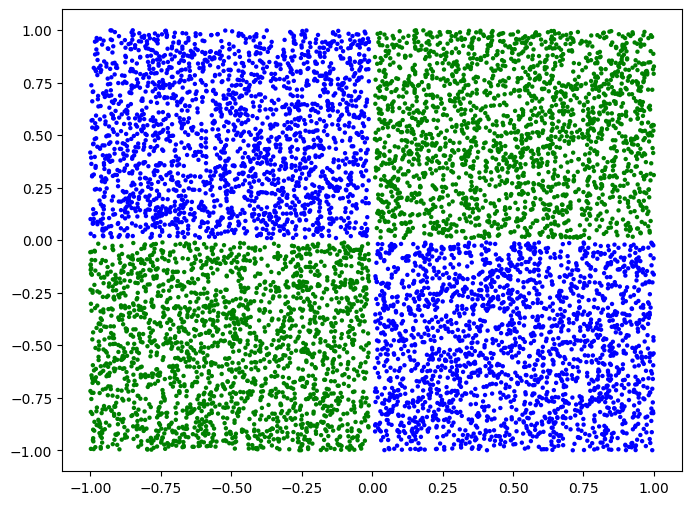

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1], c=cmp[y], s=10, edgecolors='none')
plt.show()

Learning Using AD

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


# Optional for our test
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=0)

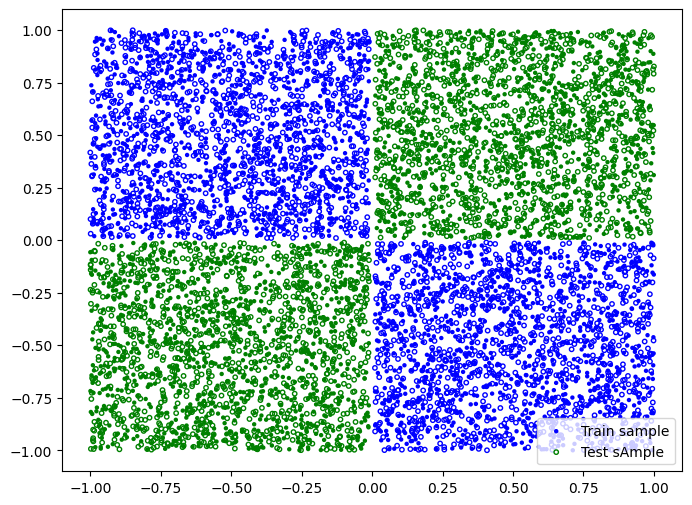

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0],X_train[:,1], c=cmp[y_train], s=10, edgecolors='none', label="Train sample")
plt.scatter(X_test[:,0], X_test[:,1], c='none' ,s=10, edgecolors=cmp[y_test], label="Test sAmple")
plt.legend()
plt.show()

In [8]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test,y_test)

0.99875

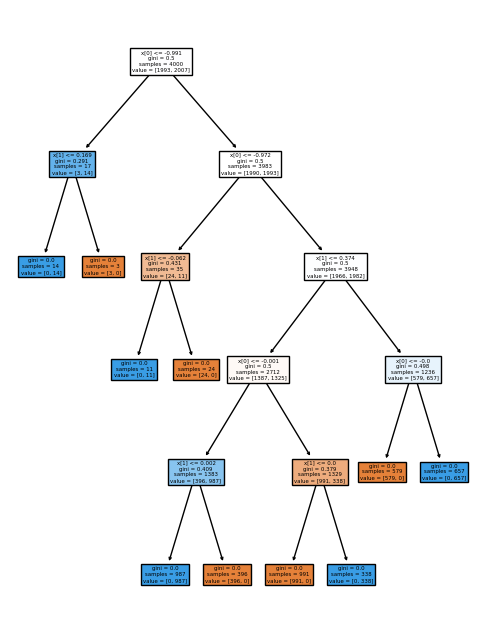

In [9]:
plt.figure( figsize=(6,8))
plot_tree(clf, filled=True)
plt.show()

First way to display boundaries (not recommanded)

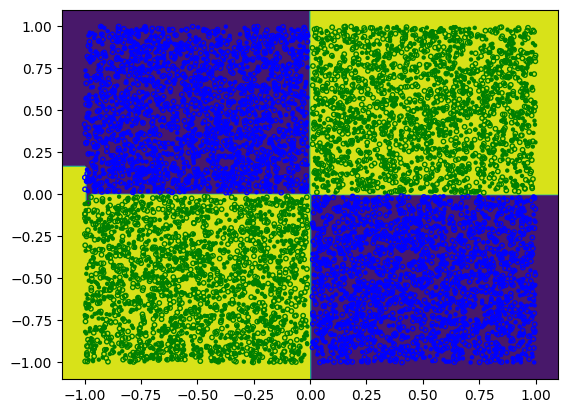

In [10]:
xx, yy = np.meshgrid(np.linspace(-(1+0.1)*b, (1+0.1)*b, 200), np.linspace(-(1+0.1)*b, (1+0.1)*b, 200))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
y_pred = np.reshape(clf.predict(grid), xx.shape)
display = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=y_pred)
display.plot()

display.ax_.scatter(X_train[:,0],X_train[:,1], c=cmp[y_train], s=10, edgecolors='none', label="Train sample")
display.ax_.scatter(X_test[:,0], X_test[:,1], c='none' ,s=10, edgecolors=cmp[y_test], label="Test sAmple")


Second way to display boundaries (highly recommanded)

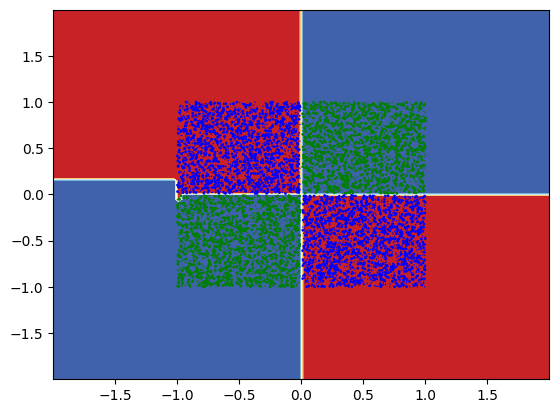

In [11]:
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
    )
ax.scatter(X_train[:,0],X_train[:,1], c=cmp[y_train], s=1, edgecolors='none', label="Train sample")
ax.scatter(X_test[:,0], X_test[:,1], c='none' ,s=1, edgecolors=cmp[y_test], label="Test sAmple")

Impact of rotation

In [12]:
import math
# 2D Rotation Matrix

theta = math.pi/8

R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

In [13]:
X_s = np.dot(X_train,R)

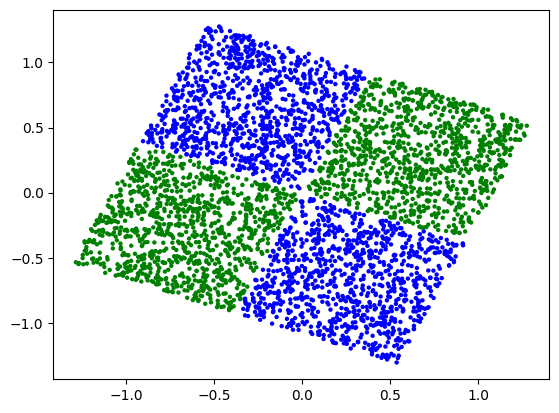

In [14]:
plt.scatter(X_s[:,0],X_s[:,1], c=cmp[y_train], s=10, edgecolors='none', label="Train sample")

In [15]:
clf = DecisionTreeClassifier(max_depth=5).fit(X_s, y_train)
clf.score(X_s, y_train)

0.93275

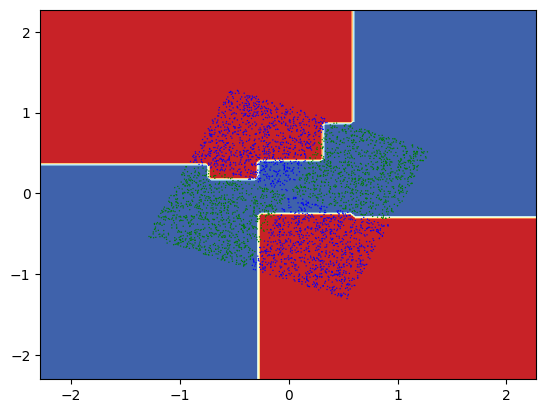

In [16]:
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_s,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
    )
ax.scatter(X_s[:,0],X_s[:,1], c=cmp[y_train], s=1, edgecolors='none', label="Train sample")


In [17]:
clf.get_depth()

5